In [2]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.offline as py
import io
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7febb119f9e8>)

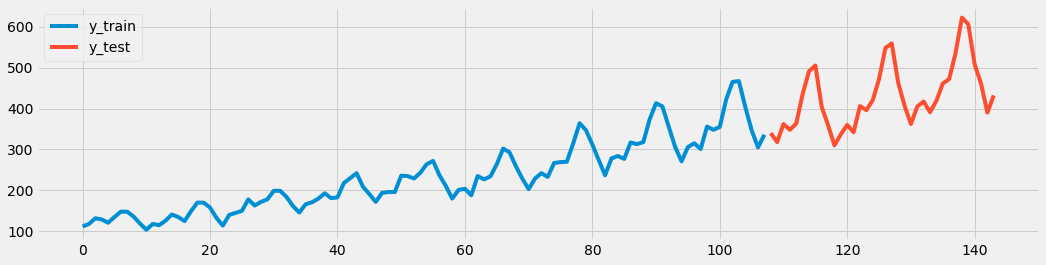

In [5]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting.forecasting import plot_ys

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])

create naive baseline


0.2319577038795143

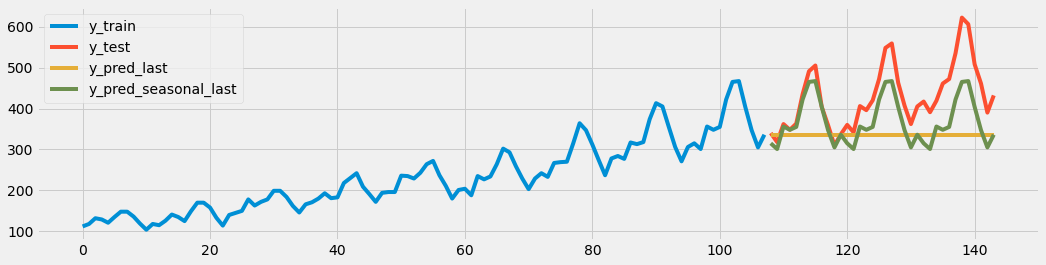

In [16]:
import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = np.arange(1, len(y_test) + 1)  # forecasting horizon

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

naive_forecaster_seasonal = NaiveForecaster(strategy="seasonal_last", sp=12)
naive_forecaster_seasonal.fit(y_train)
y_seasonal_last = naive_forecaster_seasonal.predict(fh)

plot_ys(y_train, y_test, y_last, y_seasonal_last, labels=["y_train", "y_test", "y_pred_last", "y_pred_seasonal_last"]);
smape_loss(y_last, y_test)


sklearn regressors with forcasting


0.12907692002424503

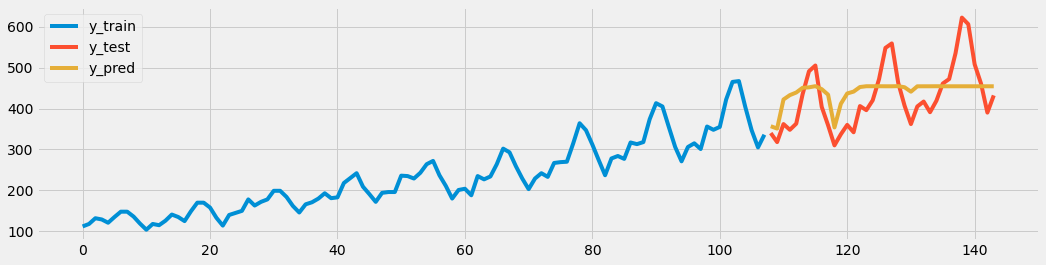

In [17]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss

regressor = RandomForestRegressor()
forecaster = ReducedRegressionForecaster(regressor, window_length=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

plot_ys(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
smape_loss(y_test, y_pred)

Forcasting with autoarima

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



0.04117062368222738

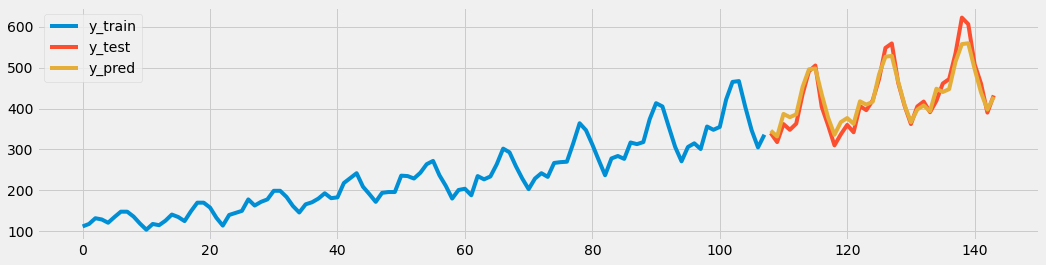

In [22]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

Time Series Classification


In [8]:
from sktime.datasets import load_arrow_head
from sktime.classification.compose import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9433962264150944